In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(2)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0


In [12]:
target=train.loc[:,'Upvotes']
target=pd.DataFrame(target)
target.head(2)

,Upvotes
0,42.0
1,1175.0


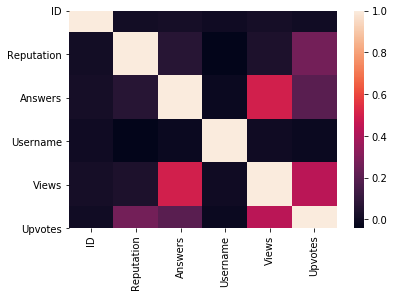

In [3]:
corr=train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
train=train.drop(['Tag','ID','Username'],axis=1)

In [14]:
x=train.drop('Upvotes',axis=1)
y=target
x.head(2),y.head(2)

(   Reputation  Answers    Views
 0      3942.0      2.0   7855.0
 1     26046.0     12.0  55801.0,    Upvotes
 0     42.0
 1   1175.0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_train=poly_reg.fit_transform(X_train)
poly_reg.fit(X_train,y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [19]:
X_test=poly_reg.fit_transform(X_test)

In [20]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
predicted_linReg = linReg.predict(X_test)

print("RMSE Linear: %.2f" % np.sqrt(mean_squared_error(y_test, predicted_linReg)))
print('************************************************')
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 GradientBoostingRegressor:",score)
predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train GradientBoostingRegressor: ',rmse_train)
print('rmse_test GradientBoostingRegressor: ',rmse_test)
print('************************************************')
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 xgb:",score)

predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train xgb: ',rmse_train)
print('rmse_test xgb: ',rmse_test)
print('************************************************')
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 RandomForestRegressor: ",score)

predictions_train=model.predict(X_train)
predictions_train=pd.DataFrame(predictions_train)
#predictions_train.head()

rmse_train=np.sqrt(mean_squared_error(y_train, predictions_train))
#print(rmse_train)

predictions_test=model.predict(X_test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_test.head()

rmse_test=np.sqrt(mean_squared_error(y_test, predictions_test))
#print(rmse_test)

print('rmse_train RandomForestRegressor: ',rmse_train)
print('rmse_test RandomForestRegressor: ',rmse_test)
print('************************************************')

RMSE Linear: 783.83
************************************************
r2 GradientBoostingRegressor: 0.9762213276587652
rmse_train GradientBoostingRegressor:  587.0082776697552
rmse_test GradientBoostingRegressor:  1171.8975456191067
************************************************
[10:31:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 xgb: 0.9738918319525482
rmse_train xgb:  615.0899397853873
rmse_test xgb:  1187.8578767712443
************************************************
r2 RandomForestRegressor:  0.9841897980813177
rmse_train RandomForestRegressor:  478.65117841169484
rmse_test RandomForestRegressor:  1191.022998067983
************************************************


In [21]:
test=pd.read_csv('test.csv')
test.head()

ids_df=test.loc[:,'ID']
ids_df=pd.DataFrame(ids_df)
ids_df.columns=['ID']
ids_df.head()

test=test.drop(['Tag','ID','Username'],axis=1)
test.head()

,Reputation,Answers,Views
0,5645.0,3.0,33200.0
1,24511.0,6.0,2730.0
2,927.0,1.0,21167.0
3,21.0,6.0,18528.0
4,4475.0,10.0,57240.0


In [24]:
test=poly_reg.fit_transform(test)

### Prediction with xgb

In [25]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 xgb:",score)

predictions_train=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)

predictions_test.head()

[11:02:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 xgb: 0.9738918319525482


,0
0,4.95
1,9.00
2,1.90
3,18.50
4,122.20


In [26]:
predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
result.head(1)

result.to_csv('D:\Result2_XGB.csv',index=False)

## Prediction with Linear

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)
predicted_linReg = linReg.predict(test)
predicted_linReg=pd.DataFrame(predicted_linReg)

predicted_linReg.columns=['Upvotes']
predicted_linReg.head(1)

result=pd.concat([ids_df,predicted_linReg],axis=1)
result.head(1)

result.to_csv('D:\Result2_Linear.csv',index=False)

## Prediction with GradientBoostingRegressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 GradientBoostingRegressor:",score)
predictions_test=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
result.head(1)

result.to_csv('D:\Result2_GBR.csv',index=False)

r2 GradientBoostingRegressor: 0.9762213276587652


## Prediction with RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
score=model.score(X_train, y_train)
print("r2 RandomForestRegressor: ",score)

predictions_test=model.predict(test)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
print(result.head(1))

result.to_csv('D:\Result2_Random.csv',index=False)

r2 RandomForestRegressor:  0.9841897980813177
       ID  Upvotes
0  366953    189.2


## With standard Scalar and PolynomialFeatures 

In [ ]:
pd.read_csv('test.csv')

In [34]:
train1=pd.read_csv('train.csv')
target1=target.copy()

In [37]:
train1.head(1)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0


In [38]:
X = train1.drop(['Tag','ID','Username'], axis=1)
y = target1             
X=X.drop(['Upvotes'], axis=1)      


from sklearn.model_selection import train_test_split
X, x_test, y, y_test = train_test_split(X,y,test_size=.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)
x_test=scalar.fit_transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X=poly_reg.fit_transform(X)

poly_reg.fit(X,y)

x_test=poly_reg.fit_transform(x_test)

In [39]:
test=pd.read_csv('test.csv')
X_test= test.drop(['Tag','ID','Username'], axis=1)

X_test=scalar.fit_transform(X_test)
    
X_testing= poly_reg.fit_transform(X_test)

In [42]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(X,y)
score=model.score(X, y)
print("r2 xgb:",score)

predictions_train=model.predict(X_testing)
predictions_test=pd.DataFrame(predictions_test)
predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
result.head(1)

result.to_csv('D:\Result3_XGB.csv',index=False)

[11:22:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 xgb: 0.9713609841122756


In [43]:
linReg = LinearRegression()
linReg.fit(X,y)
predicted_linReg = linReg.predict(X_testing)
predicted_linReg=pd.DataFrame(predicted_linReg)

predicted_linReg.columns=['Upvotes']
predicted_linReg.head(1)

result=pd.concat([ids_df,predicted_linReg],axis=1)
result.head(1)

result.to_csv('D:\Result3_Linear.csv',index=False)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(X,y)
score=model.score(X,y)
print("r2 GradientBoostingRegressor:",score)
predictions_test=model.predict(X_testing)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
result.head(1)

result.to_csv('D:\Result3_GBR.csv',index=False)

r2 GradientBoostingRegressor: 0.9745082116640053


In [45]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X,y)
score=model.score(X,y)
print("r2 RandomForestRegressor: ",score)

predictions_test=model.predict(X_testing)
predictions_test=pd.DataFrame(predictions_test)
#predictions_train.head()

predictions_test.columns=['Upvotes']
predictions_test.head(1)

result=pd.concat([ids_df,predictions_test],axis=1)
print(result.head(1))

result.to_csv('D:\Result3_Random.csv',index=False)

r2 RandomForestRegressor:  0.9808054950757902
       ID  Upvotes
0  366953    198.6
